# Explore Kaggle Train and Test dataset

https://www.kaggle.com/c/sentiment-analysis-on-movie-reviews/data

In [1]:
# Jypyter notebook specific
%matplotlib inline
from IPython.display import display, HTML

# Standard imports
import logging

logging.basicConfig(format='%(asctime)s %(message)s',
                    datefmt='%d/%m/%Y %H:%M:%S',
                    level=10)

# Dependecy imports
import numpy as np # linear algebra
import seaborn as sn # To get nice plots

# Local imports
from data.load_dataset import TRAIN_SET, TEST_SET

02/10/2017 22:06:46 Train, number of phrases: 156060
02/10/2017 22:06:46 Test, number of phrases: 66292


In [2]:
display(TRAIN_SET.describe())
display(TEST_SET.describe())

,Phrase,Sentiment
count,156060,156060
unique,155797,5
top,,2
freq,18,79582


,Phrase
count,66292
unique,66204
top,
freq,15


## The sentiment labels are:
```
0 - negative
1 - somewhat negative
2 - neutral
3 - somewhat positive
4 - positive
```

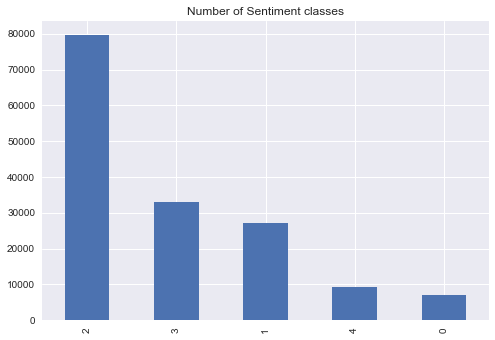

In [4]:
TRAIN_SET['Sentiment'].value_counts().plot(kind='bar', title='Number of Sentiment classes')

## Example of data where Sentiment is not neutral

In [11]:
TRAIN_SET[TRAIN_SET['Sentiment'] != '2'].head(20)

,Phrase,Sentiment
0,a series of escapades demonstrating the adage ...,1
21,good for the goose,3
22,good,3
33,the gander some of which occasionally amuses ...,1
46,amuses,3
47,but none of which amounts to much of a story,1
49,none of which amounts to much of a story,1
63,this quiet introspective and entertaining ind...,4
64,this quiet introspective and entertaining ind...,3
66,quiet introspective and entertaining independent,4


## Number of words per Phrase in both datasets

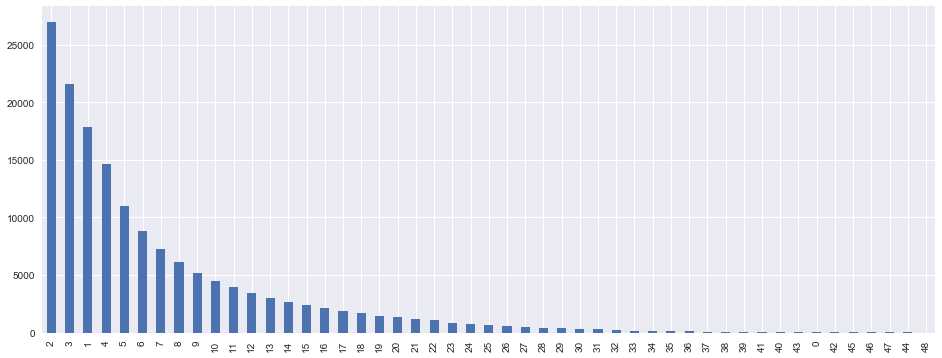

In [60]:
TRAIN_SET['Phrase'].str.split().str.len().value_counts().plot(kind='bar', figsize=(16, 6))

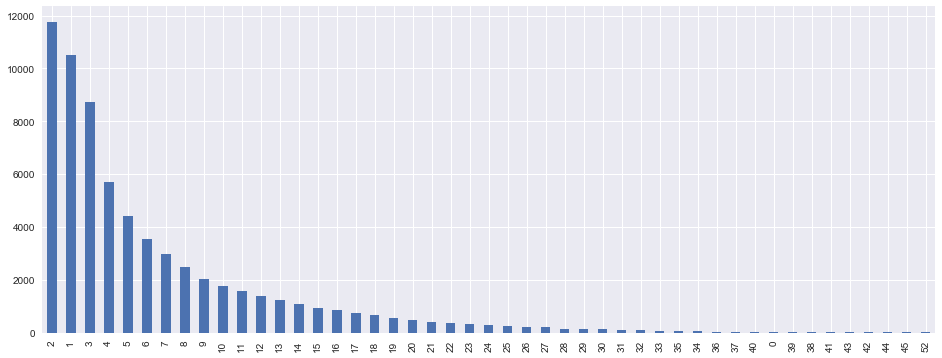

In [61]:
TEST_SET['Phrase'].str.split().str.len().value_counts().plot(kind='bar', figsize=(16, 6))

## 20 most popular words in boths sets

In [84]:
unique_words_train = TRAIN_SET['Phrase'].str.split(' ', expand=True).stack()

print('Unique words:', unique_words_train.unique().shape[0])
unique_words_train.value_counts().head(30)

Unique words: 16418


         72314
the      51220
a        36130
of       32308
and      31763
to       22448
s        17002
in       13745
is       13447
that     12327
it       11677
as        8633
with      7750
for       7417
its       7051
film      6689
an        6479
movie     5905
this      5677
but       5126
dtype: int64

In [85]:
unique_words_test = TEST_SET['Phrase'].str.split(' ', expand=True).stack()

print('Unique words:', unique_words_test.unique().shape[0])
unique_words_test.value_counts().head(30)

Unique words: 9958


         27525
the      19942
a        13935
and      12471
of       12351
to        9051
s         6585
in        5537
is        5322
it        4857
that      4531
as        3353
with      2972
its       2942
for       2847
this      2529
an        2448
film      2436
movie     2230
but       2001
dtype: int64

In [88]:
print(unique_words_test.unique().shape)
print(unique_words_train.unique().shape)

(9958,)
(16418,)


## Words which are in Test set but not in Train set

In [136]:
not_in_train = unique_words_test.unique()[~np.in1d(unique_words_test.unique(), unique_words_train.unique())]

print('Words in Test but not in Train', not_in_train.shape[0])
unique_words_test[unique_words_test.isin(not_in_train)].value_counts().head(30)

Words in Test but not in Train (2914,)


boxing             45
professionalism    44
applaud            39
1978               39
architectural      38
cheerful           35
swaggering         34
andrew             33
spit               32
riff               32
torpor             31
legitimate         30
moldy              30
unearthed          30
mold               30
divide             30
respectful         29
implicit           29
puccini            29
increasing         28
dtype: int64

## Words which are in Ttra set but not in Test set

In [137]:
not_in_test = unique_words_train.unique()[~np.in1d(unique_words_train.unique(), unique_words_test.unique())]

print('Words in Test but not in Train', not_in_test.shape[0])
unique_words_train[unique_words_train.isin(not_in_test)].value_counts().head(30)

Words in Test but not in Train 9374


conclusion        144
various           110
smile             106
animal            101
knowledge          96
theatre            95
broken             95
season             93
signs              92
indian             91
graphic            90
deadly             86
tiny               84
superb             83
pack               83
notice             80
exquisite          79
firstrate          78
payoff             77
limited            76
darker             73
cross              72
belly              72
schneider          71
dawson             71
lifeaffirming      70
belt               70
sake               69
niche              69
simultaneously     69
dtype: int64

## Thoughts

As of word frequncy, unique words and most common words we can see that both dataset are pretty similarly divided except Train set have much more unique words than Test set which ok.

It's worth noting that some words (2914) which can be found in Test Set cannot be found in Train set. e.g. Boxing, professionalism, applaud. This is obvius flaw in our training set however their occurances are not very fequent max 45 for boxing, also Tokenizer (Word embeddings) will help us to deal with this problem by understanding what words are nearby.

Train set however have 9374 words which can't be found in Test set with tops of 144 occurances "colclusion"